<a href="https://colab.research.google.com/github/SukanyaPathak2904/CrossProduct_prediction/blob/main/Cross2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.metrics


In [ ]:
dftrain = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cross_product_prediction/train.csv')
dftest = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cross_product_prediction/test.csv')
#df['Age']= df['Age'].apply(lambda x: str(x).replace('0-17','17')if '0-17' in str(x) else str(x))

In [ ]:
dftrain.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
dftrain['Vehicle_Age'] = dftrain['Vehicle_Age'].apply(lambda x: str(x).replace('> 2 Years', '3')if '> 2 Years' in str(x) else (x))
dftrain['Vehicle_Age'] = dftrain['Vehicle_Age'].apply(lambda x: str(x).replace('1-2 Year', '1')if '1-2 Year' in str(x) else (x))
dftrain['Vehicle_Age'] = dftrain['Vehicle_Age'].apply(lambda x: str(x).replace('< 1 Year', '2') if '< 1 Year' in str(x) else(x))

In [ ]:
dftrain.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,3,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,3,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,2,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,2,No,27496.0,152.0,39,0


In [ ]:
import math

In [ ]:
dftrain['monthly_prem']= dftrain['Annual_Premium']/12

In [ ]:
dftrain['monthly_prem']

0         3371.166667
1         2794.666667
2         3191.166667
3         2384.916667
4         2291.333333
             ...     
381104    2514.166667
381105    3334.666667
381106    2926.500000
381107    3718.083333
381108    3481.416667
Name: monthly_prem, Length: 381109, dtype: float64

In [ ]:
dftrain['monthly_prem'].describe()

count    381109.000000
mean       2547.032465
std        1434.429588
min         219.166667
25%        2033.750000
50%        2639.083333
75%        3283.333333
max       45013.750000
Name: monthly_prem, dtype: float64

In [ ]:
dftrain['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [ ]:
dftrain.loc[(dftrain['Response']==1) & (dftrain['monthly_prem']>= 2900)]
#df.loc[(df['Age']==50)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,monthly_prem
0,1,Male,44,1,28.0,0,3,Yes,40454.0,26.0,217,1,3371.166667
2,3,Male,47,1,28.0,0,3,Yes,38294.0,26.0,27,1,3191.166667
10,11,Female,47,1,35.0,0,1,Yes,47576.0,124.0,46,1,3964.666667
26,27,Female,51,1,28.0,0,1,Yes,38341.0,124.0,49,1,3195.083333
78,79,Male,29,1,28.0,0,1,Yes,42567.0,26.0,167,1,3547.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380969,380970,Male,50,1,8.0,0,1,Yes,43214.0,7.0,48,1,3601.166667
381029,381030,Female,36,1,28.0,0,1,Yes,53840.0,152.0,242,1,4486.666667
381061,381062,Female,41,1,28.0,0,1,Yes,37377.0,124.0,99,1,3114.750000
381075,381076,Female,61,1,28.0,0,1,Yes,43875.0,26.0,139,1,3656.250000


In [ ]:
dftrain['Vintage'].unique()

array([217, 183,  27, 203,  39, 176, 249,  72,  28,  80,  46, 289, 221,
        15,  58, 147, 256, 299, 158, 102, 116, 177, 232,  60, 180,  49,
        57, 223, 136, 222, 149, 169,  88, 253, 107, 264, 233,  45, 184,
       251, 153, 186,  71,  34,  83,  12, 246, 141, 216, 130, 282,  73,
       171, 283, 295, 165,  30, 218,  22,  36,  79,  81, 100,  63, 242,
       277,  61, 111, 167,  74, 235, 131, 243, 248, 114, 281,  62, 189,
       139, 138, 209, 254, 291,  68,  92,  52,  78, 156, 247, 275,  77,
       181, 229, 166,  16,  23,  31, 293, 219,  50, 155,  66, 260,  19,
       258, 117, 193, 204, 212, 144, 234, 206, 228, 125,  29,  18,  84,
       230,  54, 123, 101,  86,  13, 237,  85,  98,  67, 128,  95,  89,
        99, 208, 134, 135, 268, 284, 119, 226, 105, 142, 207, 272, 263,
        64,  40, 245, 163,  24, 265, 202, 259,  91, 106, 190, 162,  33,
       194, 287, 292,  69, 239, 132, 255, 152, 121, 150, 143, 198, 103,
       127, 285, 214, 151, 199,  56,  59, 215, 104, 238, 120,  2

In [ ]:
dftrain['Vintage'].max()


299

In [ ]:
dftrain.rename(columns={"Vintage": "Days_with_Customers"}, inplace=True)

In [ ]:
dftrain['Days_with_Customers'] = dftrain['Days_with_Customers']/30

In [ ]:
dftrain.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Days_with_Customers,Response,monthly_prem
0,1,Male,44,1,28.0,0,3,Yes,40454.0,26.0,7.233333,1,3371.166667
1,2,Male,76,1,3.0,0,1,No,33536.0,26.0,6.100000,0,2794.666667
2,3,Male,47,1,28.0,0,3,Yes,38294.0,26.0,0.900000,1,3191.166667
3,4,Male,21,1,11.0,1,2,No,28619.0,152.0,6.766667,0,2384.916667
4,5,Female,29,1,41.0,1,2,No,27496.0,152.0,1.300000,0,2291.333333


In [ ]:
dftrain.rename(columns={"Days_with_Customers": "Months_with_customers"}, inplace=True)

In [ ]:
dftrain.loc[(dftrain['Response']==0) & (dftrain['Previously_Insured']==0) & (dftrain['Gender']=='Male')]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
1,2,Male,76,1,3.0,0,1,No,33536.0,26.0,6.100000,0,2794.666667
6,7,Male,23,1,11.0,0,2,Yes,23367.0,152.0,8.300000,0,1947.250000
13,14,Male,76,1,28.0,0,1,Yes,36770.0,13.0,0.500000,0,3064.166667
18,19,Male,42,1,28.0,0,1,Yes,33667.0,124.0,5.266667,0,2805.583333
20,21,Male,65,1,28.0,0,1,Yes,41184.0,124.0,3.866667,0,3432.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381084,381085,Male,22,1,15.0,0,2,No,28218.0,152.0,7.933333,0,2351.500000
381085,381086,Male,39,1,28.0,0,1,Yes,30374.0,163.0,7.066667,0,2531.166667
381095,381096,Male,52,1,28.0,0,1,Yes,38323.0,124.0,2.300000,0,3193.583333
381103,381104,Male,47,1,50.0,0,1,Yes,39831.0,26.0,7.833333,0,3319.250000


In [ ]:
dftrain.loc[(dftrain['Response']==0) & (dftrain['Previously_Insured']==0) & (dftrain['Gender']=='Female')]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
5,6,Female,24,1,33.0,0,2,Yes,2630.0,160.0,5.866667,0,219.166667
16,17,Female,25,1,45.0,0,2,Yes,26218.0,160.0,8.533333,0,2184.833333
30,31,Female,26,1,8.0,0,2,No,2630.0,160.0,4.533333,0,219.166667
32,33,Female,48,1,28.0,0,1,Yes,36951.0,122.0,4.966667,0,3079.250000
33,34,Female,24,1,36.0,0,2,Yes,43129.0,152.0,1.633333,0,3594.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381098,381099,Female,68,1,33.0,0,3,Yes,36326.0,26.0,6.533333,0,3027.166667
381099,381100,Female,51,1,28.0,0,1,Yes,44504.0,26.0,2.366667,0,3708.666667
381100,381101,Female,29,1,28.0,0,2,Yes,49007.0,124.0,4.566667,0,4083.916667
381101,381102,Female,70,1,28.0,0,3,Yes,50904.0,122.0,7.166667,0,4242.000000


In [ ]:
dftrain.loc[(dftrain['Vehicle_Damage']== 'Yes') & (dftrain['Previously_Insured']== 0) &(dftrain['Response']==0)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
5,6,Female,24,1,33.0,0,2,Yes,2630.0,160.0,5.866667,0,219.166667
6,7,Male,23,1,11.0,0,2,Yes,23367.0,152.0,8.300000,0,1947.250000
13,14,Male,76,1,28.0,0,1,Yes,36770.0,13.0,0.500000,0,3064.166667
16,17,Female,25,1,45.0,0,2,Yes,26218.0,160.0,8.533333,0,2184.833333
18,19,Male,42,1,28.0,0,1,Yes,33667.0,124.0,5.266667,0,2805.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381099,381100,Female,51,1,28.0,0,1,Yes,44504.0,26.0,2.366667,0,3708.666667
381100,381101,Female,29,1,28.0,0,2,Yes,49007.0,124.0,4.566667,0,4083.916667
381101,381102,Female,70,1,28.0,0,3,Yes,50904.0,122.0,7.166667,0,4242.000000
381103,381104,Male,47,1,50.0,0,1,Yes,39831.0,26.0,7.833333,0,3319.250000


In [ ]:
dftrain.loc[(dftrain['Vehicle_Damage']== 'Yes') & (dftrain['Previously_Insured']==0) & (dftrain['Response']==0) & (dftrain['Gender']== 'Male')]


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
6,7,Male,23,1,11.0,0,2,Yes,23367.0,152.0,8.300000,0,1947.250000
13,14,Male,76,1,28.0,0,1,Yes,36770.0,13.0,0.500000,0,3064.166667
18,19,Male,42,1,28.0,0,1,Yes,33667.0,124.0,5.266667,0,2805.583333
20,21,Male,65,1,28.0,0,1,Yes,41184.0,124.0,3.866667,0,3432.000000
21,22,Male,49,1,28.0,0,1,Yes,50791.0,124.0,5.900000,0,4232.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381072,381073,Male,49,1,47.0,0,1,Yes,43707.0,124.0,2.500000,0,3642.250000
381079,381080,Male,33,1,28.0,0,2,Yes,69845.0,26.0,3.833333,0,5820.416667
381085,381086,Male,39,1,28.0,0,1,Yes,30374.0,163.0,7.066667,0,2531.166667
381095,381096,Male,52,1,28.0,0,1,Yes,38323.0,124.0,2.300000,0,3193.583333


In [ ]:
dftrain.loc[(dftrain['Vehicle_Damage']== 'Yes') & (dftrain['Previously_Insured']==0) & (dftrain['Response']==0) & (dftrain['Gender']== 'Female')]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
5,6,Female,24,1,33.0,0,2,Yes,2630.0,160.0,5.866667,0,219.166667
16,17,Female,25,1,45.0,0,2,Yes,26218.0,160.0,8.533333,0,2184.833333
32,33,Female,48,1,28.0,0,1,Yes,36951.0,122.0,4.966667,0,3079.250000
33,34,Female,24,1,36.0,0,2,Yes,43129.0,152.0,1.633333,0,3594.083333
54,55,Female,44,1,28.0,0,1,Yes,45415.0,13.0,2.433333,0,3784.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381098,381099,Female,68,1,33.0,0,3,Yes,36326.0,26.0,6.533333,0,3027.166667
381099,381100,Female,51,1,28.0,0,1,Yes,44504.0,26.0,2.366667,0,3708.666667
381100,381101,Female,29,1,28.0,0,2,Yes,49007.0,124.0,4.566667,0,4083.916667
381101,381102,Female,70,1,28.0,0,3,Yes,50904.0,122.0,7.166667,0,4242.000000


In [ ]:
dftest.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [ ]:
dftrain['Vehicle_Age'] = dftrain['Vehicle_Age'].apply(lambda x: str(x).replace('> 2 Years', '3')if '> 2 Years' in str(x) else (x))


In [ ]:
dftest['Vehicle_Age'] =  dftest['Vehicle_Age'].apply(lambda x:str(x).replace('> 2 Year', '3')if '> 2 Year' in str(x) else (x))
dftest['Vehicle_Age'] = dftest['Vehicle_Age'].apply(lambda x:str(x).replace('1-2 Year', '1') if '1-2 Year' in str(x) else str(x))
dftest['Vehicle_Age'] = dftest['Vehicle_Age'].apply(lambda x:str(x).replace('< 1 Year', '2') if '< 1 Year' in str(x) else str(x))

In [ ]:
dftest.rename(columns={'Vintage': 'Months_with_customers'}, inplace=True)

In [ ]:
dftest.describe(include= 'all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers
count,127037.000000,127037,127037.000000,127037.000000,127037.000000,127037.000000,127037,127037,127037.000000,127037.000000,127037.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1,Yes,NaN,NaN,NaN
freq,NaN,68236,NaN,NaN,NaN,NaN,66699,63835,NaN,NaN,NaN
mean,444628.000000,NaN,38.765903,0.998134,26.459866,0.460039,NaN,NaN,30524.643576,111.800468,154.318301
std,36672.567411,NaN,15.465814,0.043152,13.209916,0.498403,NaN,NaN,16945.297103,54.371765,83.661588
min,381110.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000
25%,412869.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24325.000000,26.000000,82.000000
50%,444628.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31642.000000,135.000000,154.000000
75%,476387.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39408.000000,152.000000,227.000000


In [ ]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     127037 non-null  int64  
 1   Gender                 127037 non-null  object 
 2   Age                    127037 non-null  int64  
 3   Driving_License        127037 non-null  int64  
 4   Region_Code            127037 non-null  float64
 5   Previously_Insured     127037 non-null  int64  
 6   Vehicle_Age            127037 non-null  object 
 7   Vehicle_Damage         127037 non-null  object 
 8   Annual_Premium         127037 non-null  float64
 9   Policy_Sales_Channel   127037 non-null  float64
 10  Months_with_customers  127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [ ]:
df = pd.concat([dftrain,dftest], ignore_index= True, axis=0)

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
0,1,Male,44,1,28.0,0,3,Yes,40454.0,26.0,7.233333,1.0,3371.166667
1,2,Male,76,1,3.0,0,1,No,33536.0,26.0,6.100000,0.0,2794.666667
2,3,Male,47,1,28.0,0,3,Yes,38294.0,26.0,0.900000,1.0,3191.166667
3,4,Male,21,1,11.0,1,2,No,28619.0,152.0,6.766667,0.0,2384.916667
4,5,Female,29,1,41.0,1,2,No,27496.0,152.0,1.300000,0.0,2291.333333


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,381109.000000,381109.000000
mean,254073.500000,38.808413,0.997936,26.406572,0.458667,30554.453041,111.975838,42.438407,0.122563,2547.032465
std,146689.259281,15.500179,0.045388,13.224921,0.498289,17146.574625,54.246027,76.993807,0.327936,1434.429588
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,0.333333,0.000000,219.166667
25%,127037.250000,25.000000,1.000000,15.000000,0.000000,24381.000000,26.000000,3.533333,0.000000,2033.750000
50%,254073.500000,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,6.766667,0.000000,2639.083333
75%,381109.750000,49.000000,1.000000,35.000000,1.000000,39403.750000,152.000000,9.991667,0.000000,3283.333333
max,508146.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,45013.750000


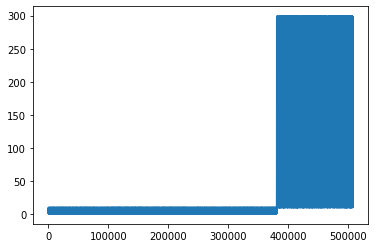

In [ ]:
df['Months_with_customers'].plot()

In [ ]:
dftrain['Gender'].mode()

0    Male
dtype: object

In [ ]:
dftest['Gender'].mode()

0    Male
dtype: object

In [ ]:
dftest['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
grouped_on_Gen = df.groupby(by= df['Gender'])

In [ ]:
grouped_on_Gen

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
Gender,,,,,,,,,,,,
Female,5,29,1,41.0,1,2,No,27496.0,152.0,1.300000,0.0,2291.333333
Male,1,44,1,28.0,0,3,Yes,40454.0,26.0,7.233333,1.0,3371.166667


In [ ]:
grouped_on_Gen.get_group('Male')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
0,1,Male,44,1,28.0,0,3,Yes,40454.0,26.0,7.233333,1.0,3371.166667
1,2,Male,76,1,3.0,0,1,No,33536.0,26.0,6.100000,0.0,2794.666667
2,3,Male,47,1,28.0,0,3,Yes,38294.0,26.0,0.900000,1.0,3191.166667
3,4,Male,21,1,11.0,1,2,No,28619.0,152.0,6.766667,0.0,2384.916667
6,7,Male,23,1,11.0,0,2,Yes,23367.0,152.0,8.300000,0.0,1947.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508138,508139,Male,64,1,28.0,0,1,No,39038.0,26.0,62.000000,NaN,NaN
508140,508141,Male,21,1,8.0,1,2,No,35767.0,152.0,195.000000,NaN,NaN
508143,508144,Male,21,1,46.0,1,2,No,29802.0,152.0,74.000000,NaN,NaN
508144,508145,Male,71,1,28.0,1,1,No,62875.0,26.0,265.000000,NaN,NaN


In [ ]:
grouped_on_Gen.get_group('Female')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
4,5,Female,29,1,41.0,1,2,No,27496.0,152.0,1.300000,0.0,2291.333333
5,6,Female,24,1,33.0,0,2,Yes,2630.0,160.0,5.866667,0.0,219.166667
7,8,Female,56,1,28.0,0,1,Yes,32031.0,26.0,2.400000,1.0,2669.250000
8,9,Female,24,1,3.0,1,2,No,27619.0,152.0,0.933333,0.0,2301.583333
9,10,Female,32,1,6.0,1,2,No,28771.0,152.0,2.666667,0.0,2397.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508134,508135,Female,54,1,26.0,0,1,Yes,28395.0,26.0,204.000000,NaN,NaN
508135,508136,Female,28,1,8.0,1,2,No,2630.0,151.0,51.000000,NaN,NaN
508139,508140,Female,71,1,3.0,1,1,No,2630.0,124.0,147.000000,NaN,NaN
508141,508142,Female,26,1,37.0,1,2,No,30867.0,152.0,56.000000,NaN,NaN


In [ ]:
df.isnull().sum()

id                            0
Gender                        0
Age                           0
Driving_License               0
Region_Code                   0
Previously_Insured            0
Vehicle_Age                   0
Vehicle_Damage                0
Annual_Premium                0
Policy_Sales_Channel          0
Months_with_customers         0
Response                 127037
monthly_prem             127037
dtype: int64

In [ ]:
dftest['monthly_prem'] = abs(dftest['Annual_Premium']/12)

In [ ]:
dftest.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,monthly_prem
0,381110,Male,25,1,11.0,1,2,No,35786.0,152.0,53,2982.166667
1,381111,Male,40,1,28.0,0,1,Yes,33762.0,7.0,111,2813.500000
2,381112,Male,47,1,28.0,0,1,Yes,40050.0,124.0,199,3337.500000
3,381113,Male,24,1,27.0,1,2,Yes,37356.0,152.0,187,3113.000000
4,381114,Male,27,1,28.0,1,2,No,59097.0,152.0,297,4924.750000


In [ ]:
df= pd.concat([dftrain,dftest],axis=0, ignore_index= True)

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
0,1,Male,44,1,28.0,0,3,Yes,40454.0,26.0,7.233333,1.0,3371.166667
1,2,Male,76,1,3.0,0,1,No,33536.0,26.0,6.100000,0.0,2794.666667
2,3,Male,47,1,28.0,0,3,Yes,38294.0,26.0,0.900000,1.0,3191.166667
3,4,Male,21,1,11.0,1,2,No,28619.0,152.0,6.766667,0.0,2384.916667
4,5,Female,29,1,41.0,1,2,No,27496.0,152.0,1.300000,0.0,2291.333333


In [ ]:
df['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [ ]:
policy_grp_channel = df.groupby('Policy_Sales_Channel')

In [ ]:
channel26 = policy_grp_channel.get_group(26.0)
channel152 = policy_grp_channel.get_group(152.0)
channel124 = policy_grp_channel.get_group(124.0)
channel160 = policy_grp_channel.get_group(160.0)
channel14 = policy_grp_channel.get_group(14.0)
channel13 = policy_grp_channel.get_group(13.0)
channel30 = policy_grp_channel.get_group(30.0)
channel156 = policy_grp_channel.get_group(156.0)
channel163 = policy_grp_channel.get_group(163.0)
channel157 = policy_grp_channel.get_group(157.0)
channel122 = policy_grp_channel.get_group(122.0)

In [ ]:
channel19 = policy_grp_channel.get_group(19.0)
channel22 = policy_grp_channel.get_group(22.0)
channel15 = policy_grp_channel.get_group(15.0)
channel154 = policy_grp_channel.get_group(154.0)
channel16 = policy_grp_channel.get_group(16.0)
channel52 = policy_grp_channel.get_group(52.0)
channel155 =  policy_grp_channel.get_group(155.0)
channel11 =  policy_grp_channel.get_group(11.0)
channel151 = policy_grp_channel.get_group(151.0)
channel125 = policy_grp_channel.get_group(125.0)
channel25 = policy_grp_channel.get_group(25.0)

In [ ]:
channel61 = policy_grp_channel.get_group(61.0)
channel1 = policy_grp_channel.get_group(1.0)
channel86 = policy_grp_channel.get_group(86.0)
channel31 = policy_grp_channel.get_group(31.0)
channel150 = policy_grp_channel.get_group(150.0)
channel23 = policy_grp_channel.get_group(23.0)
channel60 = policy_grp_channel.get_group(60.0)
channel21 =  policy_grp_channel.get_group(21.0)
channel3 = policy_grp_channel.get_group(13.0)
channel139 = policy_grp_channel.get_group(139.0)

In [ ]:
channel61

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
225,226,Female,53,1,28.0,1,1,No,44313.0,61.0,1.100000,0.0,3692.750000
1048,1049,Male,47,1,28.0,1,1,No,35116.0,61.0,1.266667,0.0,2926.333333
2216,2217,Male,47,1,28.0,0,1,Yes,43455.0,61.0,7.733333,0.0,3621.250000
2805,2806,Male,50,1,28.0,1,1,No,44795.0,61.0,3.866667,0.0,3732.916667
3124,3125,Male,44,1,28.0,0,1,No,31445.0,61.0,3.266667,0.0,2620.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
506048,506049,Female,56,1,28.0,0,1,Yes,2630.0,61.0,70.000000,NaN,219.166667
506760,506761,Male,44,1,28.0,1,1,No,55598.0,61.0,127.000000,NaN,4633.166667
506926,506927,Female,41,1,28.0,1,1,No,53173.0,61.0,141.000000,NaN,4431.083333
507064,507065,Male,50,1,28.0,0,3s,Yes,39169.0,61.0,73.000000,NaN,3264.083333


In [ ]:
channel12 = policy_grp_channel.get_group(12.0)
channel29 = policy_grp_channel.get_group(29.0)
channel55 = policy_grp_channel.get_group(55.0)
channel7 = policy_grp_channel.get_group(7.0)
channel47 = policy_grp_channel.get_group(47.0)
channel127 = policy_grp_channel.get_group(127.0)
channel153 = policy_grp_channel.get_group(153.0)
channel78 = policy_grp_channel.get_group(78.0)
channel158 = policy_grp_channel.get_group(158.0)
channel89 = policy_grp_channel.get_group(89.0)
channel32 = policy_grp_channel.get_group(32.0)

In [ ]:
channel8 = policy_grp_channel.get_group(8.0)
channel10 =  policy_grp_channel.get_group(10.0)
channel120 = policy_grp_channel.get_group(120.0)
channel65 =  policy_grp_channel.get_group(65.0)
channel4 =  policy_grp_channel.get_group(4.0)
channel42 = policy_grp_channel.get_group(42.0)
channel83 = policy_grp_channel.get_group(83.0)
channel136 = policy_grp_channel.get_group(136.0)
channel24 = policy_grp_channel.get_group(24.0)
channel18 = policy_grp_channel.get_group(18.0)
channel56 = policy_grp_channel.get_group(56.0)

In [ ]:
channel48 =  policy_grp_channel.get_group(48.0)
channel106 =  policy_grp_channel.get_group(106.0)
channel54 =  policy_grp_channel.get_group(54.0)
channel93 =  policy_grp_channel.get_group(93.0)
channel116 =  policy_grp_channel.get_group(116.0)
channel91 =  policy_grp_channel.get_group(91.0)
channel45 =  policy_grp_channel.get_group(45.0)
channel9 =  policy_grp_channel.get_group(9.0)
channel145 =  policy_grp_channel.get_group(145.0)
channel147 = policy_grp_channel.get_group(147.0)
channel44 = policy_grp_channel.get_group(44.0)

In [ ]:
channel109 = policy_grp_channel.get_group(109.0)
channel37 = policy_grp_channel.get_group(37.0)
channel140 = policy_grp_channel.get_group(140.0)
channel107 = policy_grp_channel.get_group(107.0)
channel128 = policy_grp_channel.get_group(128.0)
channel131 =  policy_grp_channel.get_group(131.0)
channel114 = policy_grp_channel.get_group(114.0)
channel118 = policy_grp_channel.get_group(118.0)
channel159 = policy_grp_channel.get_group(159.0)
channel119 = policy_grp_channel.get_group(119.0)
channel105 = policy_grp_channel.get_group(105.0)

In [ ]:
channel135 =  policy_grp_channel.get_group(135.0)
channel62 =  policy_grp_channel.get_group(62.0)
channel138 = policy_grp_channel.get_group(138.0)
channel129 = policy_grp_channel.get_group(129.0)
channel88  = policy_grp_channel.get_group(88.0)
channel92 =  policy_grp_channel.get_group(92.0)
channel111 = policy_grp_channel.get_group(111.0)
channel113 = policy_grp_channel.get_group(113.0)
channel73 = policy_grp_channel.get_group(73.0)
channel36 = policy_grp_channel.get_group(36.0)
channel28 = policy_grp_channel.get_group(28.0)

In [ ]:
channel35 = policy_grp_channel.get_group(35.0)
channel59 = policy_grp_channel.get_group(59.0)
channel53 = policy_grp_channel.get_group(53.0)
channel148 = policy_grp_channel.get_group(148.0)
channel133 = policy_grp_channel.get_group(133.0)
channel108 = policy_grp_channel.get_group(108.0)
channel64 = policy_grp_channel.get_group(64.0)
channel39 = policy_grp_channel.get_group(39.0)
channel94 = policy_grp_channel.get_group(94.0)
channel132 = policy_grp_channel.get_group(132.0)
channel46 = policy_grp_channel.get_group(46.0)

In [ ]:
channel81 =  policy_grp_channel.get_group(81.0)
channel103 =  policy_grp_channel.get_group(103.0)
channel90 =  policy_grp_channel.get_group(90.0)
channel51 =  policy_grp_channel.get_group(51.0)
channel27 =  policy_grp_channel.get_group(27.0)
channel146 =  policy_grp_channel.get_group(146.0)
channel63 =  policy_grp_channel.get_group(63.0)
channel96 =  policy_grp_channel.get_group(96.0)
channel40 =   policy_grp_channel.get_group(40.0)
channel66 =  policy_grp_channel.get_group(66.0)
channel100 = policy_grp_channel.get_group(100.0)

In [ ]:
channel95 =  policy_grp_channel.get_group(95.0)
channel123 =  policy_grp_channel.get_group(123.0)
channel98 =   policy_grp_channel.get_group(98.0)
channel75 =  policy_grp_channel.get_group(75.0)
channel69 =  policy_grp_channel.get_group(69.0)
channel130 =  policy_grp_channel.get_group(130.0)
channel134  =  policy_grp_channel.get_group(134.0)
channel49 =  policy_grp_channel.get_group(49.0)
channel97 =  policy_grp_channel.get_group(97.0)
channel38 =  policy_grp_channel.get_group(38.0)
channel17 =  policy_grp_channel.get_group(17.0)

In [ ]:
channel110 =  policy_grp_channel.get_group(110.0)
channel80 =  policy_grp_channel.get_group(80.0)
channel71 = policy_grp_channel.get_group(71.0)
channel117 = policy_grp_channel.get_group(117.0)
channel58 =  policy_grp_channel.get_group(58.0)
channel20 = policy_grp_channel.get_group(20.0)
channel76 = policy_grp_channel.get_group(76.0)
channel104 =  policy_grp_channel.get_group(104.0)
channel87 = policy_grp_channel.get_group(87.0)
channel84 = policy_grp_channel.get_group(84.0)
channel137 = policy_grp_channel.get_group(137.0)

In [ ]:
channel126 = policy_grp_channel.get_group(126.0)
channel68 = policy_grp_channel.get_group(68.0)
channel67= policy_grp_channel.get_group(67.0)
channel101 = policy_grp_channel.get_group(101.0)
channel115 = policy_grp_channel.get_group(115.0)
channel57 = policy_grp_channel.get_group(57.0)
channel82 = policy_grp_channel.get_group(82.0)
channel79 = policy_grp_channel.get_group(79.0)
channel112 = policy_grp_channel.get_group(112.0)
channel99 = policy_grp_channel.get_group(99.0)
channel70 = policy_grp_channel.get_group(70.0)

In [ ]:
channel2 = policy_grp_channel.get_group(2.0)
channel34 = policy_grp_channel.get_group(34.0)
channel33 = policy_grp_channel.get_group(33.0)
channel74 = policy_grp_channel.get_group(74.0)
channel102 = policy_grp_channel.get_group(102.0)
channel149 =  policy_grp_channel.get_group(149.0)
channel43 = policy_grp_channel.get_group(43.0)
channel6 = policy_grp_channel.get_group(16.0)
channel50 = policy_grp_channel.get_group(50.0)
channel144 = policy_grp_channel.get_group(144.0)
channel143 = policy_grp_channel.get_group(143.0)

In [ ]:
channe41 = policy_grp_channel.get_group(41.0)
channel141 = policy_grp_channel.get_group(141.0)
channel142 = policy_grp_channel.get_group(142.0)

In [ ]:
channe41

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
364157,364158,Female,40,1,0.0,1,1,No,2630.0,41.0,6.666667,0.0,219.166667


In [ ]:
df['Months_with_customers'].mode()

0    8.533333
dtype: float64

In [ ]:
df.loc[(df['Months_with_customers']>= 3) & (df['Annual_Premium'] >2500)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
0,1,Male,44,1,28.0,0,3,Yes,40454.0,26.0,7.233333,1.0,3371.166667
1,2,Male,76,1,3.0,0,1,No,33536.0,26.0,6.100000,0.0,2794.666667
3,4,Male,21,1,11.0,1,2,No,28619.0,152.0,6.766667,0.0,2384.916667
5,6,Female,24,1,33.0,0,2,Yes,2630.0,160.0,5.866667,0.0,219.166667
6,7,Male,23,1,11.0,0,2,Yes,23367.0,152.0,8.300000,0.0,1947.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508141,508142,Female,26,1,37.0,1,2,No,30867.0,152.0,56.000000,NaN,2572.250000
508142,508143,Female,38,1,28.0,0,1,Yes,28700.0,122.0,165.000000,NaN,2391.666667
508143,508144,Male,21,1,46.0,1,2,No,29802.0,152.0,74.000000,NaN,2483.500000
508144,508145,Male,71,1,28.0,1,1,No,62875.0,26.0,265.000000,NaN,5239.583333


In [ ]:
dftrain.loc[(dftrain['Months_with_customers']>=3) & (dftrain['Annual_Premium'] >2500)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
0,1,Male,44,1,28.0,0,3,Yes,40454.0,26.0,7.233333,1,3371.166667
1,2,Male,76,1,3.0,0,1,No,33536.0,26.0,6.100000,0,2794.666667
3,4,Male,21,1,11.0,1,2,No,28619.0,152.0,6.766667,0,2384.916667
5,6,Female,24,1,33.0,0,2,Yes,2630.0,160.0,5.866667,0,219.166667
6,7,Male,23,1,11.0,0,2,Yes,23367.0,152.0,8.300000,0,1947.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381102,381103,Female,25,1,41.0,1,2,Yes,2630.0,152.0,3.400000,0,219.166667
381103,381104,Male,47,1,50.0,0,1,Yes,39831.0,26.0,7.833333,0,3319.250000
381105,381106,Male,30,1,37.0,1,2,No,40016.0,152.0,4.366667,0,3334.666667
381106,381107,Male,21,1,30.0,1,2,No,35118.0,160.0,5.366667,0,2926.500000


In [ ]:
dftrain.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368,0.003027
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147,0.067507
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155,-0.011906
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570,-0.010588
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170,0.004269
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575,1.000000
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042,-0.113247
Months_with_customers,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050,-0.000608
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000,0.022575
monthly_prem,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575,1.000000


In [ ]:
dftrain.drop('id',axis=1,inplace=True)

In [ ]:
dftrain.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
Age,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147,0.067507
Driving_License,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155,-0.011906
Region_Code,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570,-0.010588
Previously_Insured,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170,0.004269
Annual_Premium,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575,1.000000
Policy_Sales_Channel,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042,-0.113247
Months_with_customers,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050,-0.000608
Response,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000,0.022575
monthly_prem,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575,1.000000


In [ ]:
dftest.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Months_with_customers,monthly_prem
id,1.000000,-0.005364,-0.003581,-0.001574,-0.000281,0.001386,0.002911,0.001225,0.001386
Age,-0.005364,1.000000,-0.079374,0.038878,-0.258282,0.067038,-0.574722,0.003761,0.067038
Driving_License,-0.003581,-0.079374,1.000000,0.002596,0.012455,-0.012664,0.040185,-0.000858,-0.012664
Region_Code,-0.001574,0.038878,0.002596,1.000000,-0.022001,-0.016349,-0.041618,0.001984,-0.016349
Previously_Insured,-0.000281,-0.258282,0.012455,-0.022001,1.000000,0.006327,0.227189,-0.000953,0.006327
Annual_Premium,0.001386,0.067038,-0.012664,-0.016349,0.006327,1.000000,-0.116452,-0.001607,1.000000
Policy_Sales_Channel,0.002911,-0.574722,0.040185,-0.041618,0.227189,-0.116452,1.000000,-0.003257,-0.116452
Months_with_customers,0.001225,0.003761,-0.000858,0.001984,-0.000953,-0.001607,-0.003257,1.000000,-0.001607
monthly_prem,0.001386,0.067038,-0.012664,-0.016349,0.006327,1.000000,-0.116452,-0.001607,1.000000


In [ ]:
df.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem
id,1.000000,-0.000643,0.001362,0.001325,0.002557,0.001042,-0.002812,0.629285,-0.001368,0.001042
Age,-0.000643,1.000000,-0.079660,0.041649,-0.255582,0.067392,-0.577043,-0.000343,0.111147,0.067392
Driving_License,0.001362,-0.079660,1.000000,-0.000202,0.014370,-0.012084,0.042862,0.001876,0.010155,-0.012084
Region_Code,0.001325,0.041649,-0.000202,1.000000,-0.023991,-0.012012,-0.042223,0.002415,0.010570,-0.012012
Previously_Insured,0.002557,-0.255582,0.014370,-0.023991,1.000000,0.004776,0.221334,0.001143,-0.341170,0.004776
Annual_Premium,0.001042,0.067392,-0.012084,-0.012012,0.004776,1.000000,-0.114035,-0.001290,0.022575,1.000000
Policy_Sales_Channel,-0.002812,-0.577043,0.042862,-0.042223,0.221334,-0.114035,1.000000,-0.002453,-0.139042,-0.114035
Months_with_customers,0.629285,-0.000343,0.001876,0.002415,0.001143,-0.001290,-0.002453,1.000000,-0.001050,-0.001290
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000,0.022575
monthly_prem,0.001042,0.067392,-0.012084,-0.012012,0.004776,1.000000,-0.114035,-0.001290,0.022575,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
dftrain.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Months_with_customers', 'Response',
       'monthly_prem'],
      dtype='object')

In [ ]:
dff= pd.get_dummies(dftrain,drop_first= True)

In [ ]:
dff.dropna

<bound method DataFrame.dropna of         Age  Driving_License  ...  Vehicle_Age_3  Vehicle_Damage_Yes
0        44                1  ...              1                   1
1        76                1  ...              0                   0
2        47                1  ...              1                   1
3        21                1  ...              0                   0
4        29                1  ...              0                   0
...     ...              ...  ...            ...                 ...
381104   74                1  ...              0                   0
381105   30                1  ...              0                   0
381106   21                1  ...              0                   0
381107   68                1  ...              1                   1
381108   46                1  ...              0                   0

[381109 rows x 13 columns]>

In [ ]:
dff.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Months_with_customers,Response,monthly_prem,Gender_Male,Vehicle_Age_2,Vehicle_Age_3,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,7.233333,1,3371.166667,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,6.100000,0,2794.666667,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,0.900000,1,3191.166667,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,6.766667,0,2384.916667,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,1.300000,0,2291.333333,0,1,0,0


In [ ]:
x = dff.drop('Response', axis=1)
y= dff['Response']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
xtrain

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Months_with_customers,monthly_prem,Gender_Male,Vehicle_Age_2,Vehicle_Age_3,Vehicle_Age_3s,Vehicle_Damage_Yes
342139,342140,25,1,13.0,1,20264.0,152.0,0.933333,1688.666667,0,1,0,0,0
500178,500179,33,1,28.0,0,35294.0,124.0,285.000000,2941.166667,1,0,0,0,1
6515,6516,79,1,28.0,0,28366.0,26.0,8.233333,2363.833333,0,0,1,0,1
94713,94714,48,1,28.0,0,29387.0,124.0,4.366667,2448.916667,1,0,0,0,1
383289,383290,44,1,45.0,0,39303.0,26.0,14.000000,3275.250000,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,259179,24,1,36.0,1,22575.0,152.0,9.566667,1881.250000,0,1,0,0,0
365838,365839,56,1,35.0,0,41287.0,124.0,9.933333,3440.583333,1,0,0,0,1
131932,131933,22,1,2.0,0,18857.0,152.0,2.533333,1571.416667,0,1,0,0,1
146867,146868,44,1,32.0,1,2630.0,156.0,1.700000,219.166667,1,0,0,0,1


In [ ]:
xtest

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Months_with_customers,monthly_prem
299638,299639,Female,25,1,41.0,1,2,Yes,25011.0,152.0,3.400000,2084.250000
336405,336406,Male,33,1,11.0,0,1,Yes,27565.0,122.0,6.366667,2297.083333
373094,373095,Female,26,1,32.0,1,2,No,21887.0,152.0,1.766667,1823.916667
469314,469315,Male,24,1,27.0,1,2,No,20957.0,152.0,194.000000,1746.416667
91525,91526,Male,77,1,8.0,1,1,No,54290.0,7.0,8.333333,4524.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
211432,211433,Male,51,1,28.0,0,3,Yes,53801.0,26.0,8.300000,4483.416667
30154,30155,Female,20,1,14.0,0,1,Yes,23161.0,124.0,4.400000,1930.083333
420074,420075,Female,25,1,27.0,0,2,No,26573.0,152.0,75.000000,2214.416667
35177,35178,Female,52,1,28.0,0,1,Yes,2630.0,25.0,8.600000,219.166667


In [ ]:
lg = LogisticRegression()
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
{C: 0.5,
class_weight:classification,
dual: True,
fit_intercept: True
l1_ratio: None,
max_iter: 100,
multi_class: 'auto',
n_jobs:1,
penalty:l2,
random_state:101,
solver: 'lbfgs',
tol: 0.001
verbose = 1,
warm_start: False,
gamma:0.001
inplace= True,
C: 2.0,
class_weight= 'binomial',
 verbose = '2'
 }

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
ms = MinMaxScaler()
ss = StandardScaler()

In [ ]:
x_train_mscaled = ms.fit_transform(xtrain)
x_test_mscaled = ms.transform (xtest)

In [ ]:
lg.fit(x_train_mscaled,ytrain)
pred = lg.predict(x_test_mscaled)

In [ ]:
acc = accuracy_score(ytest, pred)

In [ ]:
acc  #previous day  0.87662

0.8766280234721626

In [ ]:
cr = classification_report(ytest,pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.93    110251\n           1       0.00      0.00      0.00     15515\n\n    accuracy                           0.88    125766\n   macro avg       0.44      0.50      0.47    125766\nweighted avg       0.77      0.88      0.82    125766\n'

In [ ]:
cm = confusion_matrix(ytest, pred)
cm

array([[110250,      1],
       [ 15515,      0]])